# Busqueda por Amplitud

# Estudiante : Gustavo Guallpa

A continuacion se ejemplifica la busqueda por amplitud revisada en clase. Para ello se tiene un ejemplo de las ciudades del territorio Ecuatoriano.


In [11]:
# Busqueda en Amplitud - Breadth First Search

# Creamos la clase Nodo
class Node:
    def __init__(self, data, child=None): # Constructor de la clase
        self.data = data
        self.child = None
        self.fathr = None
        self.cost = None
        self.set_child(child)

    def set_child(self, child): # Agregar hijos
        self.child = child
        if self.child is not None:
            for ch in self.child:
                ch.fathr = self
            
    def equal(self, node): # Igual al equals de Java
        if self.data == node.data:
            return True
        else:
            return False

    def on_list(self, node_list): # Verfiicar su el nodo esta en la lista
        listed = False
        for n in node_list:
            if self.equal(n):
                listed = True
        return listed

    def __str__(self): # Igual al toString Java
        return str(self.data)

In [2]:
# Implementacion del metodo de busqueda por amplitud
def search_Amplitud_solution(connections, init_state, solution):
    solved = False # Variable para almacenar el estado de la busqueda
    visited_nodes = [] # Nodos visitados
    frontrs_nodes = [] # Nodos en busqueda o lista nodos

    init_node = Node(init_state) # Nodo inicial
    frontrs_nodes.append(init_node)
    while (not solved) and len(frontrs_nodes) != 0:
        node = frontrs_nodes[0]
        # extraer nodo y añadirlo a visitados
        visited_nodes.append(frontrs_nodes.pop(0))
        if node.data == solution: # Preguntar se el nodo obtenido es la solucion
            solved = True
            return node # Retornamos el nodo de la solucion
        else:
            # expandir nodos hijo - ciudades con conexion
            node_data = node.data
            child_list = []
            for chld in connections[node_data]:
                child = Node(chld)
                child_list.append(child)
                if not child.on_list(visited_nodes) and not child.on_list(frontrs_nodes):
                    frontrs_nodes.append(child)
            node.set_child(child_list)

if __name__ == "__main__":
    connections = {
        'Cuenca': {'Riobamba', 'Quito', 'Guayaquil'},
        'Latacunga': {'Ambato', 'Quito'},
        'Esmeraldas': {'Manta'},
        'Manta': {'Guayaquil'},
        'Quito': {'Riobamba', 'Latacunga', 'Cuenca', 'Guayaquil', 'Puyo'},
        'Riobamba': {'Cuenca', 'Quito'},
        'Ambato': {'Latacunga', 'Puyo', 'Guayaquil'},
        'Puyo': {'Ambato', 'Quito'},
        'Machala': {'Guayaquil'},
        'Guayaquil': {'Machala', 'Ambato', 'Quito', 'Cuenca', 'Manta'}
    }

    init_state = 'Cuenca'
    solution = 'Puyo'
    solution_node = search_Amplitud_solution(connections, init_state, solution)
    # mostrar resultado
    result = []
    node = solution_node
    if node is not None: 
        while node.fathr is not None:
            result.append(node.data)
            node = node.fathr
        result.append(init_state)
        result.reverse() # Reverso el resultado (Solo para presentar)
        print(result)
    else:
        print("No hay solucion !!!!")

['Cuenca', 'Quito', 'Puyo']


In [3]:
# Agregar la solucion en markdown (Informe)

# Tarea: Cálculo del factor de ramificación
Realice el cálculo del factor de ramificación del problema de las N reinas (con N = 4). Para ello deberá realizar las siguientes actividades:

Asumir que el factor de ramificación es constante.
Despejar el valor de b
Consultar sitios externos sobre cómo realizar el cálculo


#RESOLUCION
DATOS




## Practica

Implementar un algoritmo que me permita dibujar las conexiones y los resultados del grafo.

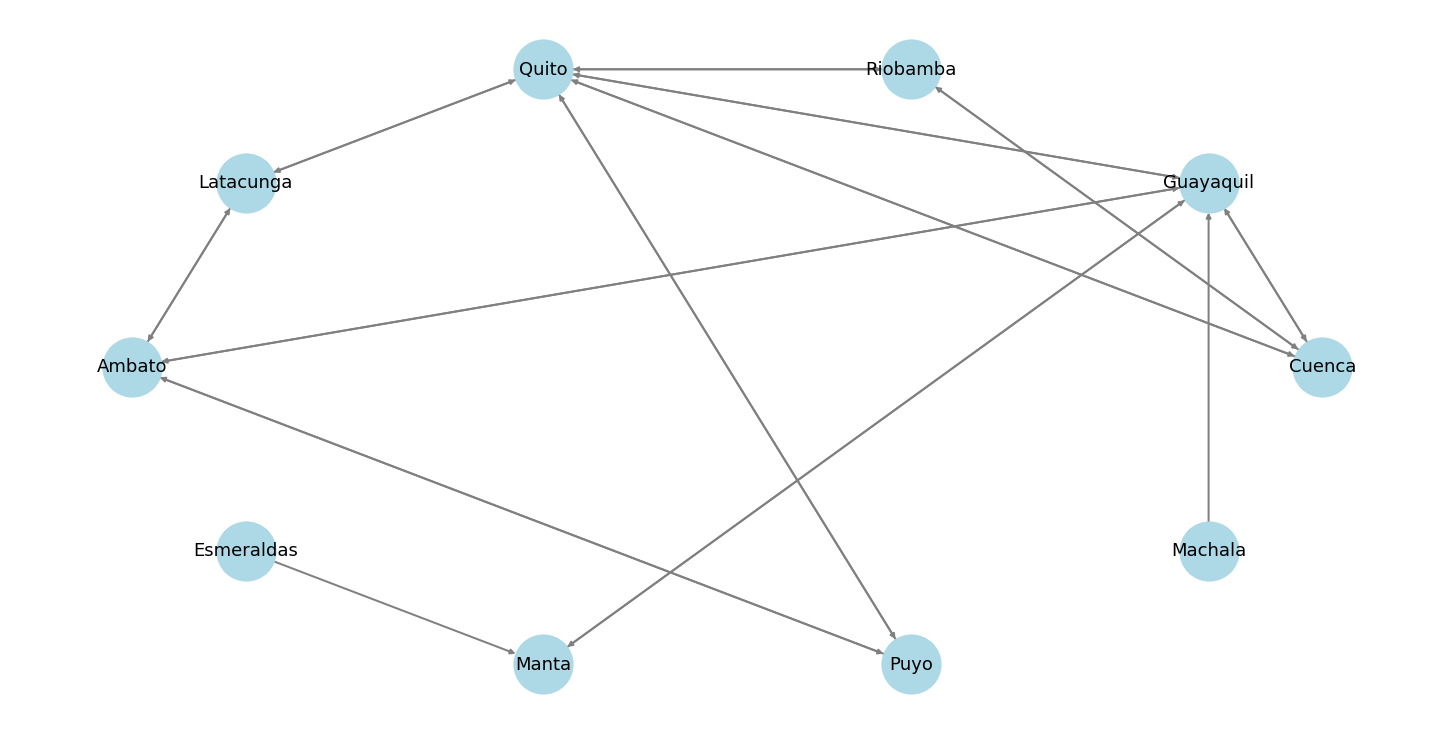

In [4]:
#Importacion de la librerias necesarias
import csv
from os import remove


# Networkx para grafos
import networkx as nx

# Pandas
import pandas as pd

# Mostrar imágenes
from IPython.display import HTML

# Mathplotlib
import matplotlib.pyplot as plt

%matplotlib inline
plt.rcParams['figure.figsize'] = (20.0, 10.0)

# Dibujo de las conexiones
connections = {
    'Cuenca': {'Riobamba', 'Quito', 'Guayaquil'},
    'Latacunga': {'Ambato', 'Quito'},
    'Esmeraldas': {'Manta'},
    'Manta': {'Guayaquil'},
    'Quito': {'Riobamba', 'Latacunga', 'Cuenca', 'Guayaquil', 'Puyo'},
    'Riobamba': {'Cuenca', 'Quito'},
    'Ambato': {'Latacunga', 'Puyo', 'Guayaquil'},
    'Puyo': {'Ambato', 'Quito'},
    'Machala': {'Guayaquil'},
    'Guayaquil': {'Machala', 'Ambato', 'Quito', 'Cuenca', 'Manta'},
}
lista = []
lista.append('origin')
lista.append('destination')
#Metodo para sacar cada uno de los valores  de una llave
def itemsLlave(nombreLlave,llave):
        listaV = connections[llave]
        for i in listaV:
                #a  =[nombreLlave,i]
                # Convetir a un tupla
                #tuple(a)
                # Clave
                lista.append(nombreLlave)
                #Valor
                lista.append(i)


for k, i in connections.items():
        #Pasamos el nombre de la llave, y sus valores.
        itemsLlave(k,k)

#Metoddo para ecribir los datos en un archivo
def escribriDatos(lista):
    file = open("ciudades.csv", "a")
    spamreader = csv.writer(file)
    spamreader.writerow(lista)
    file.close()
#
lista_nueva = []
x = 0
cont = 0
valDividir = False
while x < len(lista):
    if cont== 2:
            #print("DATOS ESCRITOS")
            escribriDatos(lista_nueva)
            #print("******")
            cont = 0
            lista_nueva = []
    if cont != 2:
        #print(lista[x])
        lista_nueva.append(lista[x])
        cont=cont+1

    x=x+1

spain_flights = pd.read_csv("ciudades.csv")
DG=nx.DiGraph()
for row in spain_flights.iterrows():
    DG.add_edge(row[1]["origin"],
                row[1]["destination"])
    
nx.draw_circular(DG,
                 node_color="lightblue",
                 edge_color="gray",
                 font_size=18,
                 width=2, with_labels=True, node_size=3500,
)
remove("ciudades.csv")

['Cuenca', 'Quito', 'Puyo']


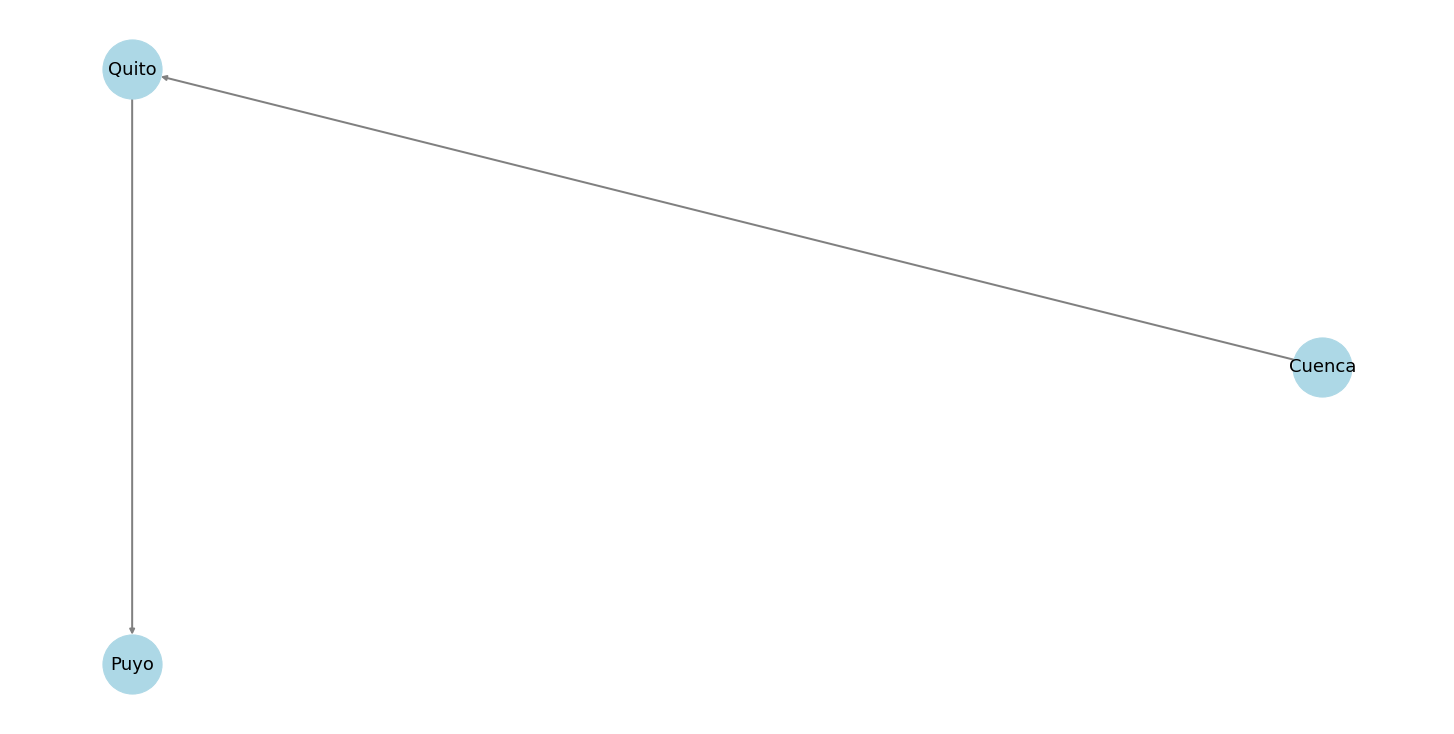

In [5]:
#**********DIBUJO DE LA SOLUCION**********#
#Importacion de la librerias necesarias
import csv
from os import remove

lista1 = []
lista1.append('origin')
lista1.append('destination')

def escribriDatos1():
    file = open("solCiudades.csv", "a")
    spamreader = csv.writer(file)
    spamreader.writerow(lista1)
    file.close()
    
escribriDatos1()
    


#Metoddo para ecribir los datos en un archivo
def escribriDatos(lista):
    file = open("solCiudades.csv", "a")
    spamreader = csv.writer(file)
    spamreader.writerow(lista)
    file.close()


lista_nueva = []
x = 0
cont = 0
while x < len(result):
    if cont != 2:
        lista_nueva.append(result[x])
        cont = cont + 1

    if cont == 2:
        escribriDatos(lista_nueva)
        cont = 0
        lista_nueva = []
        x = x -1

    x = x + 1
    
sol_lista = pd.read_csv("solCiudades.csv")
DG=nx.DiGraph()
for row in sol_lista.iterrows():
    DG.add_edge(row[1]["origin"],
                row[1]["destination"])
    
nx.draw_circular(DG,
                 node_color="lightblue",
                 edge_color="gray",
                 font_size=18,
                 width=2, with_labels=True, node_size=3500,
)

remove("solCiudades.csv")
print(result)

Mediante el uso de la herramienta de Google Maps tomar al su direccion domiciliaria como punto de partida y generar un arbol jerarquico con todos los posibles Hospitales, para ello se debe tener como primer nivel los mas cercanos y a continuacion los demas.


In [9]:
#Implementación

# Busqueda en Amplitud - Breadth First Search

# Creamos la clase Nodo
class Node:
    def __init__(self, data, child=None):  # Constructor de la clase
        self.data = data
        self.child = None
        self.fathr = None
        self.cost = None
        self.set_child(child)

    def set_child(self, child):  # Agregar hijos
        self.child = child
        if self.child is not None:
            for ch in self.child:
                ch.fathr = self

    def equal(self, node):  # Igual al equals de Java
        if self.data == node.data:
            return True
        else:
            return False

    def on_list(self, node_list):  # Verfiicar su el nodo esta en la lista
        listed = False
        for n in node_list:
            if self.equal(n):
                listed = True
        return listed

    def __str__(self):  # Igual al toString Java
        return str(self.data)


# Implementacion del metodo de busqueda por amplitud
def search_Amplitud_solution(connections, init_state, solution):
    solved = False  # Variable para almacenar el estado de la busqueda
    visited_nodes = []  # Nodos visitados
    frontrs_nodes = []  # Nodos en busqueda o lista nodos

    init_node = Node(init_state)  # Nodo inicial
    frontrs_nodes.append(init_node)
    while (not solved) and len(frontrs_nodes) != 0:
        node = frontrs_nodes[0]
        # extraer nodo y añadirlo a visitados
        visited_nodes.append(frontrs_nodes.pop(0))
        if node.data == solution:  # Preguntar se el nodo obtenido es la solucion
            solved = True
            return node  # Retornamos el nodo de la solucion
        else:
            # expandir nodos hijo - ciudades con conexion
            node_data = node.data
            child_list = []
            for chld in connections[node_data]:
                child = Node(chld)
                child_list.append(child)
                if not child.on_list(visited_nodes) and not child.on_list(frontrs_nodes):
                    frontrs_nodes.append(child)
            node.set_child(child_list)

#Mi casa se encuentra por el sector de Indurama
if __name__ == "__main__":
    connections = {
        'Casa': {'Centro de Salud Carlos Elizalde', 'Clinica Cisneros', 'Hospital Unireas', 'Clinica Humanitaria'},
        'Centro de Salud Carlos Elizalde': {'Centro de Salud Banos', 'Casa'},
        'Centro de Salud Banos': {'Centro de Salud Carlos Elizalde'},
        'Clinica Cisneros': {'Casa'},
        'Hospital Unireas': {'Hospital Monte Sinai', 'Casa'},
        'Hospital Monte Sinai': {'Hospital San Juan de Dios', 'Hospital Unireas'},
        'Hospital San Juan de Dios': {'Hospital Odontologico', 'Hospital Vicente Corral Moscoso', 'IESS Centro de Salud C',
                                  'Hospital Monte Sinai'},
        'Hospital Odontologico': {'Hospital San Juan de Dios'},
        'Hospital Vicente Corral Moscoso': {'Hospital San Juan de Dios'},
        'IESS Centro de Salud C': {'Hospital Regional Jose Carasco Arteaga', 'Hospital San Juan de Dios'},
        'Hospital Regional Jose Carasco Arteaga': {'Hospital Universitario del Rio', 'IESS Centro de Salud C'},
        'Hospital Universitario del Rio': {'Hospital Regional Jose Carasco Arteaga'},
        'Clinica Humanitaria': {'Clinica Latino', 'Casa'},
        'Clinica Latino': {'Hospital San Martin de Porres', 'Clinica Praxxel', 'Hospital Bolivar', 'Clinica Santa Ines',
                       'Clinica Humanitaria'},
        'Hospital San Martin de Porres': {'Hospital Mariano Estrella', 'Clinica Latino'},
        'Hospital Mariano Estrella': {'Hospital San Martin de Porres'},
        'Clinica Praxxel': {'Clinica Latino'},
        'Hospital Bolivar': {'Dispensario Medico IEES', 'Clinica Latino'},
        'Dispensario Medico IEES': {'Hospital Universitario Catolico', 'Centro Medico San Blass', 'Hospital Bolivar'},
        'Hospital Universitario Catolico': {'Dispensario Medico IEES'},
        'Centro Medico San Blass': {'Dispensario Medico IEES'},
        'Clinica Santa Ines': {'Clinica Latino'},
    }
    init_state = 'Casa'
    solution = 'Clinica Santa Ines'
    solution_node = search_Amplitud_solution(connections, init_state, solution)
    # mostrar resultado
    result = []
    node = solution_node
    if node is not None:
        while node.fathr is not None:
            result.append(node.data)
            node = node.fathr
        result.append(init_state)
        result.reverse()  # Reverso el resultado (Solo para presentar)
        print(result)
    else:
        print("No hay solucion !!!!")

['Casa', 'Clinica Humanitaria', 'Clinica Latino', 'Clinica Santa Ines']


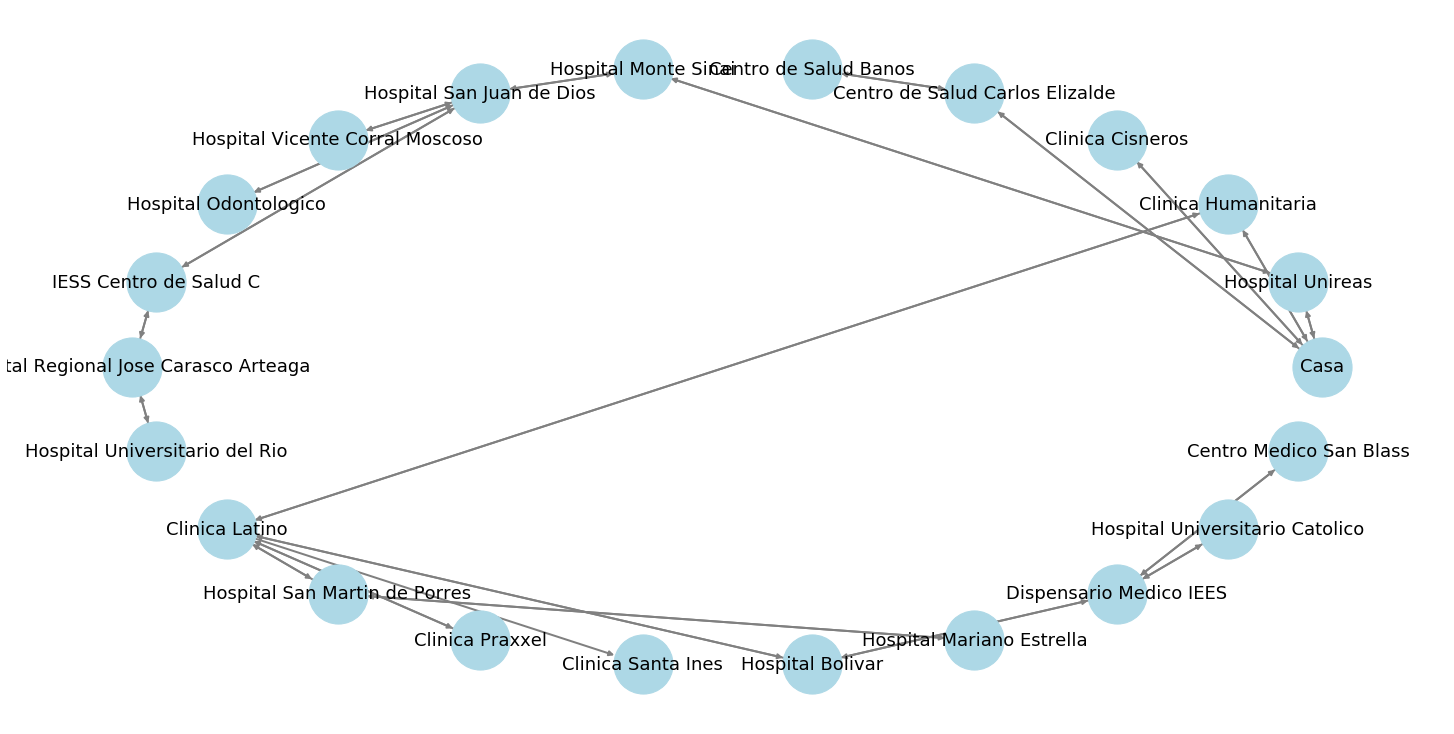

In [7]:
#Importacion de la librerias necesarias
import csv

# Networkx para grafos
import networkx as nx

# Pandas
import pandas as pd

# Mostrar imágenes
from IPython.display import HTML

# Mathplotlib
import matplotlib.pyplot as plt

%matplotlib inline
plt.rcParams['figure.figsize'] = (20.0, 10.0)

# Dibujo de las conexiones
connections = {
        'Casa': {'Centro de Salud Carlos Elizalde', 'Clinica Cisneros', 'Hospital Unireas', 'Clinica Humanitaria'},
        'Centro de Salud Carlos Elizalde': {'Centro de Salud Banos', 'Casa'},
        'Centro de Salud Banos': {'Centro de Salud Carlos Elizalde'},
        'Clinica Cisneros': {'Casa'},
        'Hospital Unireas': {'Hospital Monte Sinai', 'Casa'},
        'Hospital Monte Sinai': {'Hospital San Juan de Dios', 'Hospital Unireas'},
        'Hospital San Juan de Dios': {'Hospital Odontologico', 'Hospital Vicente Corral Moscoso', 'IESS Centro de Salud C',
                                  'Hospital Monte Sinai'},
        'Hospital Odontologico': {'Hospital San Juan de Dios'},
        'Hospital Vicente Corral Moscoso': {'Hospital San Juan de Dios'},
        'IESS Centro de Salud C': {'Hospital Regional Jose Carasco Arteaga', 'Hospital San Juan de Dios'},
        'Hospital Regional Jose Carasco Arteaga': {'Hospital Universitario del Rio', 'IESS Centro de Salud C'},
        'Hospital Universitario del Rio': {'Hospital Regional Jose Carasco Arteaga'},
        'Clinica Humanitaria': {'Clinica Latino', 'Casa'},
        'Clinica Latino': {'Hospital San Martin de Porres', 'Clinica Praxxel', 'Hospital Bolivar', 'Clinica Santa Ines',
                       'Clinica Humanitaria'},
        'Hospital San Martin de Porres': {'Hospital Mariano Estrella', 'Clinica Latino'},
        'Hospital Mariano Estrella': {'Hospital San Martin de Porres'},
        'Clinica Praxxel': {'Clinica Latino'},
        'Hospital Bolivar': {'Dispensario Medico IEES', 'Clinica Latino'},
        'Dispensario Medico IEES': {'Hospital Universitario Catolico', 'Centro Medico San Blass', 'Hospital Bolivar'},
        'Hospital Universitario Catolico': {'Dispensario Medico IEES'},
        'Centro Medico San Blass': {'Dispensario Medico IEES'},
        'Clinica Santa Ines': {'Clinica Latino'},
    }
lista2 = []
lista2.append('origin')
lista2.append('destination')
#Metodo para sacar cada uno de los valores  de una llave
def itemsLlave(nombreLlave,llave):
        listaV = connections[llave]
        for i in listaV:
                #a  =[nombreLlave,i]
                # Convetir a un tupla
                #tuple(a)
                # Clave
                lista2.append(nombreLlave)
                #Valor
                lista2.append(i)


for k, i in connections.items():
        #Pasamos el nombre de la llave, y sus valores.
        itemsLlave(k,k)

#Metoddo para ecribir los datos en un archivo
def escribriDatos(lista):
    file = open("hospitales.csv", "a")
    spamreader = csv.writer(file)
    spamreader.writerow(lista)
    file.close()
#
lista_nueva = []
x = 0
cont = 0
while x < len(lista2):
    if cont== 2:
            #print("DATOS ESCRITOS")
            escribriDatos(lista_nueva)
            #print("******")
            cont = 0
            lista_nueva = []
    if cont != 2:
        #print(lista[x])
        lista_nueva.append(lista2[x])
        cont=cont+1

    x=x+1
spain_flights = pd.read_csv("hospitales.csv")
DG=nx.DiGraph()
for row in spain_flights.iterrows():
    DG.add_edge(row[1]["origin"],
                row[1]["destination"])
    
nx.draw_circular(DG,
                 node_color="lightblue",
                 edge_color="gray",
                 font_size=18,
                 width=2, with_labels=True, node_size=3500,
)
remove("hospitales.csv")

['Casa', 'Clinica Humanitaria', 'Clinica Latino', 'Clinica Santa Ines']


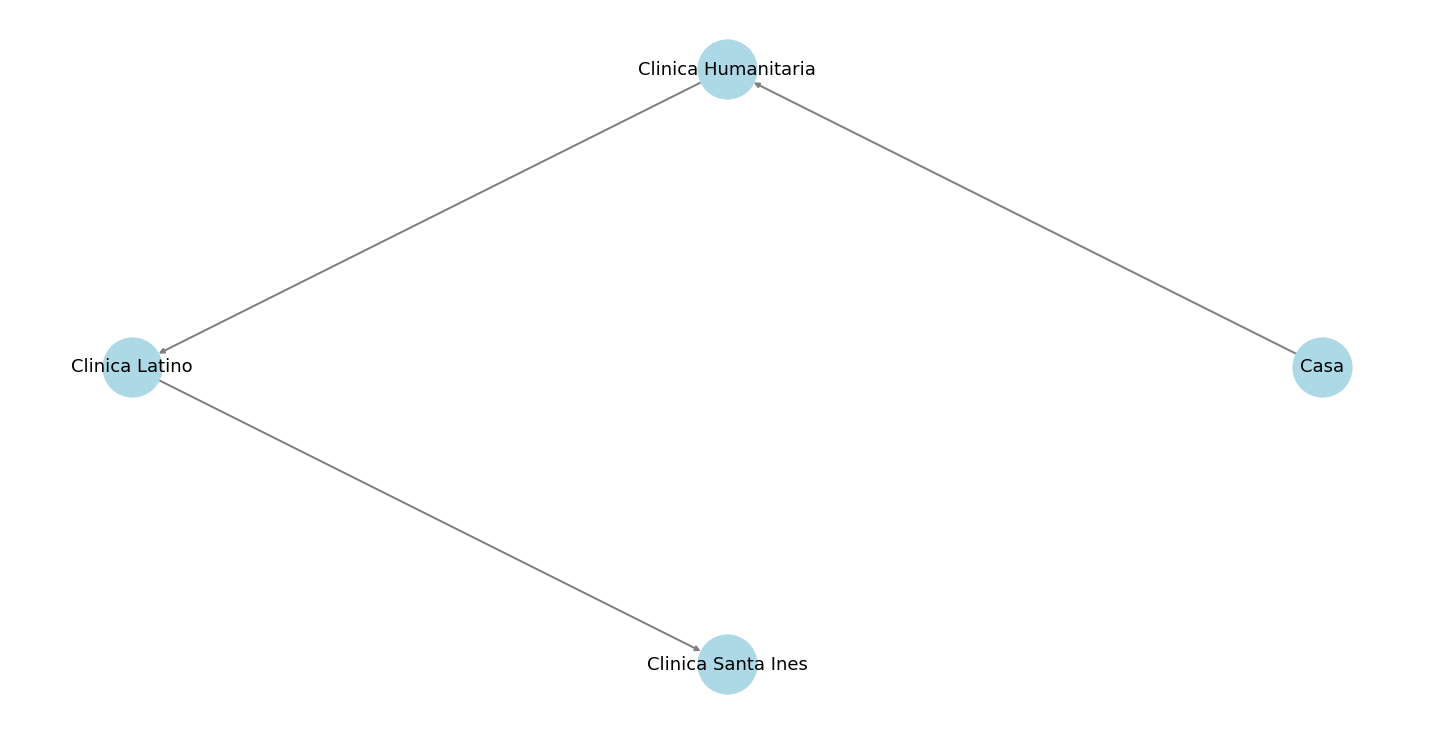

In [10]:
#**********DIBUJO DE LA SOLUCION**********#
#Importacion de la librerias necesarias
import csv
from os import remove

lista1 = []
lista1.append('origin')
lista1.append('destination')

def escribriDatos1():
    file = open("solHospitales.csv", "a")
    spamreader = csv.writer(file)
    spamreader.writerow(lista1)
    file.close()
    
escribriDatos1()
    


#Metoddo para ecribir los datos en un archivo
def escribriDatos(lista):
    file = open("solHospitales.csv", "a")
    spamreader = csv.writer(file)
    spamreader.writerow(lista)
    file.close()


lista_nueva = []
x = 0
cont = 0
while x < len(result):
    if cont != 2:
        lista_nueva.append(result[x])
        cont = cont + 1

    if cont == 2:
        escribriDatos(lista_nueva)
        cont = 0
        lista_nueva = []
        x = x -1

    x = x + 1
    
sol_lista = pd.read_csv("solHospitales.csv")
DG=nx.DiGraph()
for row in sol_lista.iterrows():
    DG.add_edge(row[1]["origin"],
                row[1]["destination"])
    
nx.draw_circular(DG,
                 node_color="lightblue",
                 edge_color="gray",
                 font_size=18,
                 width=2, with_labels=True, node_size=3500,
)

remove("solHospitales.csv")
print(result)

In [8]:
#Dibujo de los resultados


Realizar los calculos para obtener el factor de ramificacion, análisis del algoritmo en términos de completitud, optimalidad, complejidad temporal y complejidad espacial.

#RESOLUCIÓN


# Conclusiones

Subir el cuaderno con la resolucion